<center>
<img src='project4-logo.png' style="border-radius: 50%; width: 200px; height: 200px; object-fit: cover;">
</center>
<center><h1>Employee Attrition Risk Analysis</h1></center>
<center><p>HR Analytics Dashboard Dataset for Employee Attrition Analysis</p></center>
<h2>About Dataset</h2>
<p>This dataset is designed for analyzing employee attrition patterns and HR analytics using Power BI and other business intelligence tools. It includes 1,470 employee records with fields related to demographics, job satisfaction, compensation, and career progression.</p>
<h2>Source</h2>
<b>Kaggle: <a href="https://www.kaggle.com/datasets/anubhav761/hr-analytics-dashboard-employee-attrition/data">Attrition</a></b>

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('datasets/Cleaned_Employee_Data.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

# 1. Preprocessing Data

## 1. Missing Data

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.isnull().sum().sum()

np.int64(0)

## 2. Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## 3. Reduce Features

<strong>Removed features that were less informative for the EDA process</strong>

In [10]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.shape

(1470, 31)

In [12]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_cleaned.pkl', 'wb') as file:
    pickle.dump(df, file)

# 2. Exploratory Data Analysis (EDA)

In [4]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

## 1. Demographic & Personal Information

<p>In this pahse we will use the features:</p>
<ul>
<li>Age</li>
<li>Gender</li>
<li>Marital Status</li>
<li>Education</li>
<li>Education Field</li>
</ul>

In [5]:
df[['Attrition','Gender','MaritalStatus','Education','EducationField']].dtypes

Attrition         object
Gender            object
MaritalStatus     object
Education          int64
EducationField    object
dtype: object

In [6]:
df[['Attrition','Gender','MaritalStatus','Education','EducationField']].head()

,Attrition,Gender,MaritalStatus,Education,EducationField
0,Yes,Female,Single,2,Life Sciences
1,No,Male,Married,1,Life Sciences
2,Yes,Male,Single,2,Other
3,No,Female,Married,4,Life Sciences
4,No,Male,Married,1,Medical


In [7]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

In [8]:
df['EducationLevel'] = df['Education'].map(education_map)
df[['Attrition','Gender','MaritalStatus','Education','EducationLevel','EducationField']].head()

,Attrition,Gender,MaritalStatus,Education,EducationLevel,EducationField
0,Yes,Female,Single,2,College,Life Sciences
1,No,Male,Married,1,Below College,Life Sciences
2,Yes,Male,Single,2,College,Other
3,No,Female,Married,4,Master,Life Sciences
4,No,Male,Married,1,Below College,Medical


In [9]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

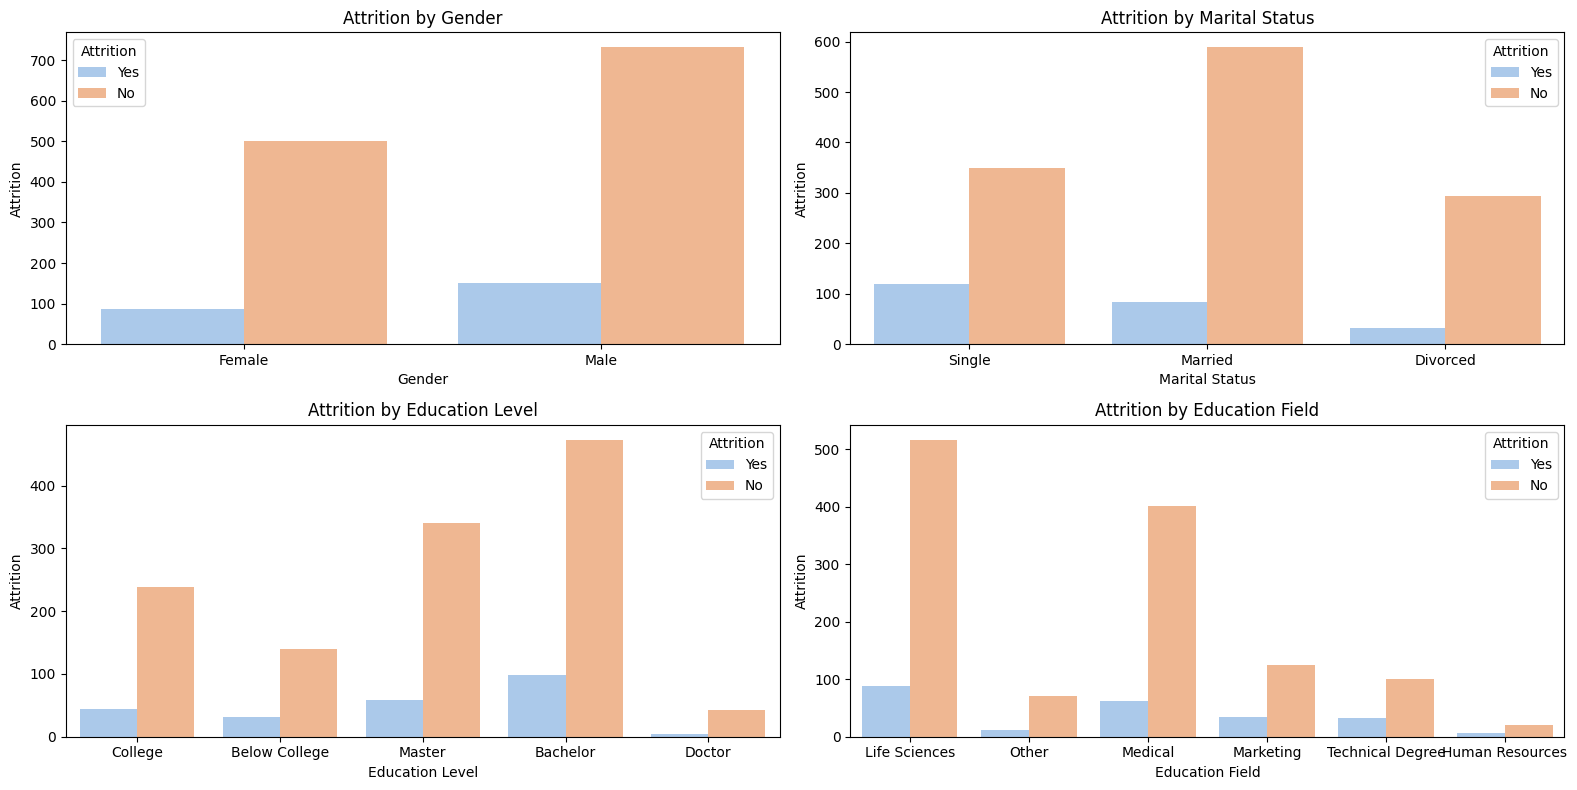

In [14]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(16,8))
# Plot 1
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel', ax=axs[0,0])
axs[0, 0].set_title('Attrition by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='pastel', ax=axs[0,1])
axs[0, 1].set_title('Attrition by Marital Status')
axs[0, 1].set_xlabel('Marital Status')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='EducationLevel', hue='Attrition', palette='pastel', ax=axs[1,0])
axs[1, 0].set_title('Attrition by Education Level')
axs[1, 0].set_xlabel('Education Level')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='pastel', ax=axs[1,1])
axs[1, 1].set_title('Attrition by Education Field')
axs[1, 1].set_xlabel('Education Field')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Show Plot
plt.tight_layout()
plt.show()

## 2. Jobs & Titles